In [2]:
from main import *
m = bi(platform='cpu')
m.data('../data/Howell1.csv', sep=';') 
m.df = m.df[m.df.age > 18]
m.scale(['weight'])
m.data_to_model(['weight', 'height'])

def model(weight):
    a = yield bi.dist.normal(178, 20, shape = 1)
    b = yield bi.dist.normal(0, 1, shape = 1)  
    s = yield bi.dist.uniform(0, 50, shape = 1)   
    y = yield Independent(Normal(a+b*weight, s), reinterpreted_batch_ndims= 1)

m.run(model = model, obs = 'height', n_chains = 1) 
m.summary()

jax.local_device_count 16
HonnorMode took: 4.1108 seconds


c:\Users\SSosa\AppData\Local\Programs\Python\Python312\Lib\site-packages\arviz\data\base.py:265: UserWarning: More chains (500) than draws (1). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


,mean,sd,hdi_5.5%,hdi_94.5%
a[0],154.66,0.27,154.28,155.11
b[0],5.42,0.28,4.99,5.82
s[0],5.16,0.20,4.84,5.46


In [ ]:
m.diag_autocor()

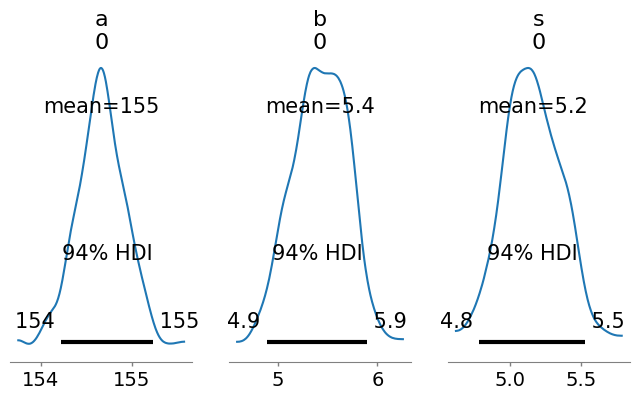

In [4]:
m.diag_posterior()

c:\Users\SSosa\AppData\Local\Programs\Python\Python312\Lib\site-packages\arviz\stats\density_utils.py:488: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
c:\Users\SSosa\AppData\Local\Programs\Python\Python312\Lib\site-packages\arviz\plots\backends\matplotlib\traceplot.py:426: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left=data.draw.min(), right=data.draw.max())
c:\Users\SSosa\AppData\Local\Programs\Python\Python312\Lib\site-packages\arviz\stats\density_utils.py:488: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")
c:\Users\SSosa\AppData\Local\Programs\Python\Python312\Lib\site-packages\arviz\plots\backends\matplotlib\traceplot.py:426: UserWarning: Attempting to set identical low and high xli

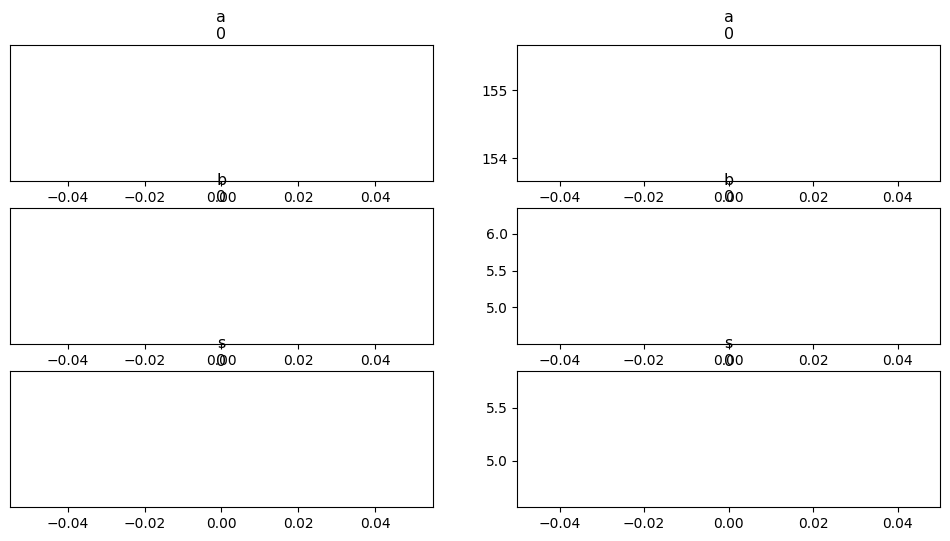

In [5]:
m.diag_traces()

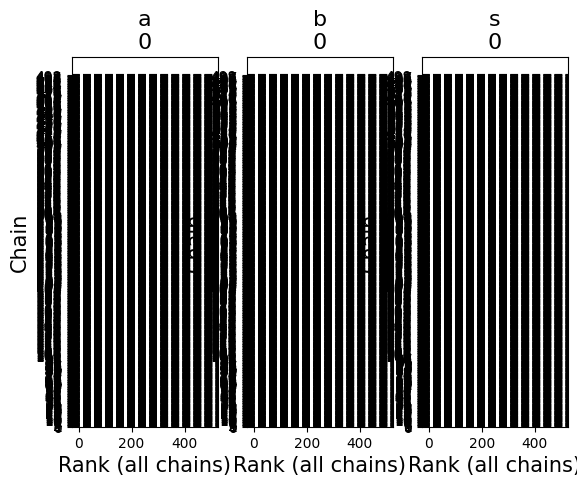

In [6]:
m.diag_rank()

array([<Axes: >, <Axes: title={'center': 'ess'}>], dtype=object)

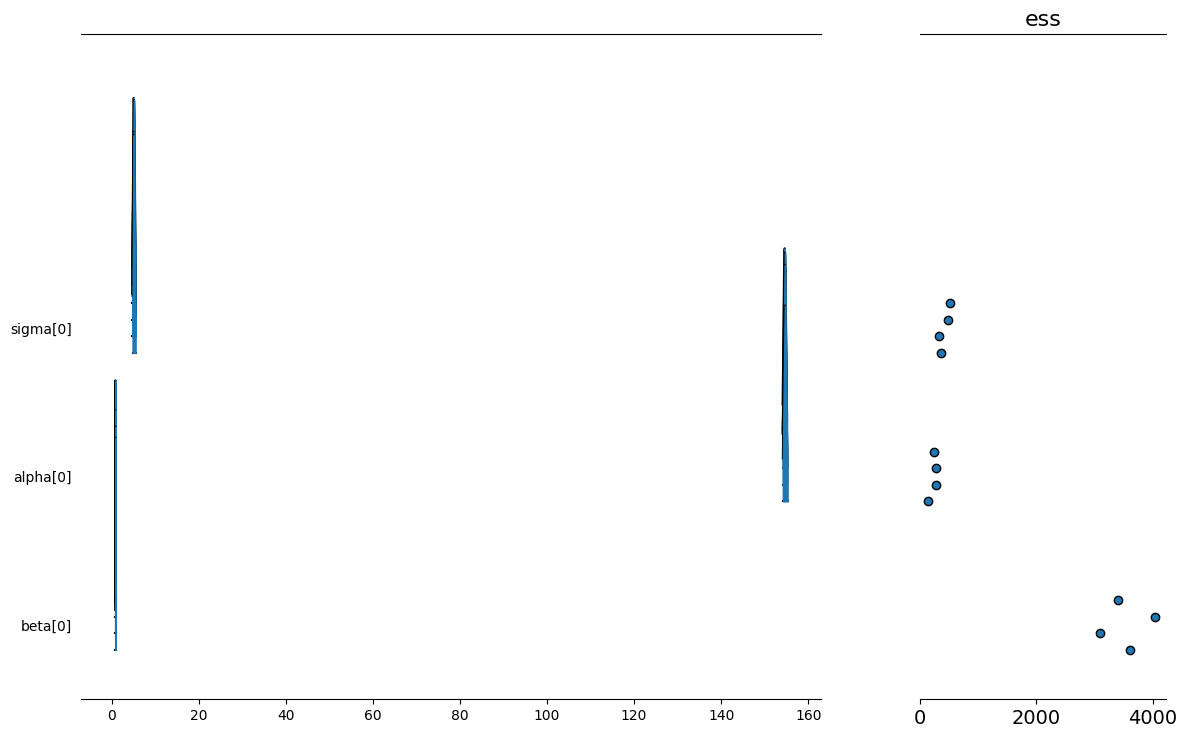

In [15]:
self.diag_forest()

array([[<Axes: ylabel='a\n0'>, <Axes: >, <Axes: >],
       [<Axes: ylabel='b\n0'>, <Axes: >, <Axes: >],
       [<Axes: xlabel='a\n0', ylabel='s\n0'>, <Axes: xlabel='b\n0'>,
        <Axes: xlabel='s\n0'>]], dtype=object)

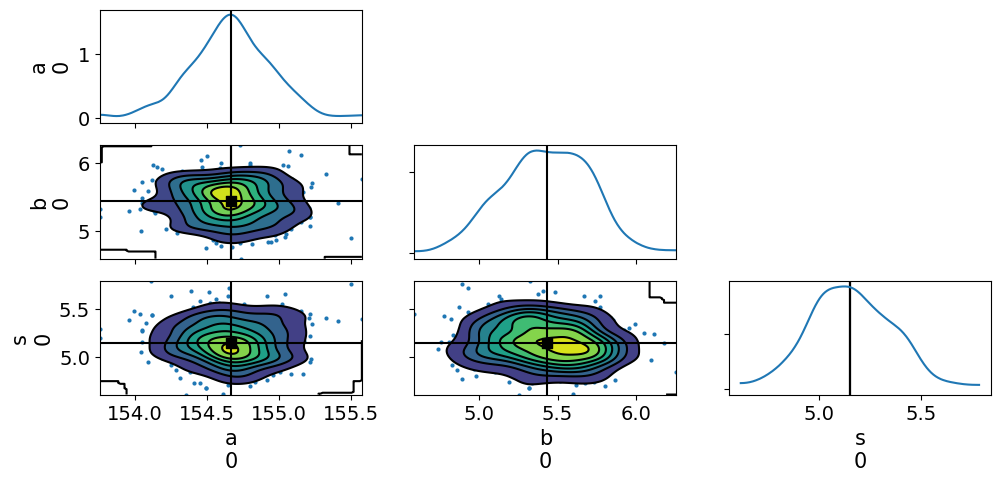

In [7]:
m.diag_pair()

array([[<Axes: title={'center': 'a\n0'}>,
        <Axes: title={'center': 'b\n0'}>,
        <Axes: title={'center': 's\n0'}>]], dtype=object)

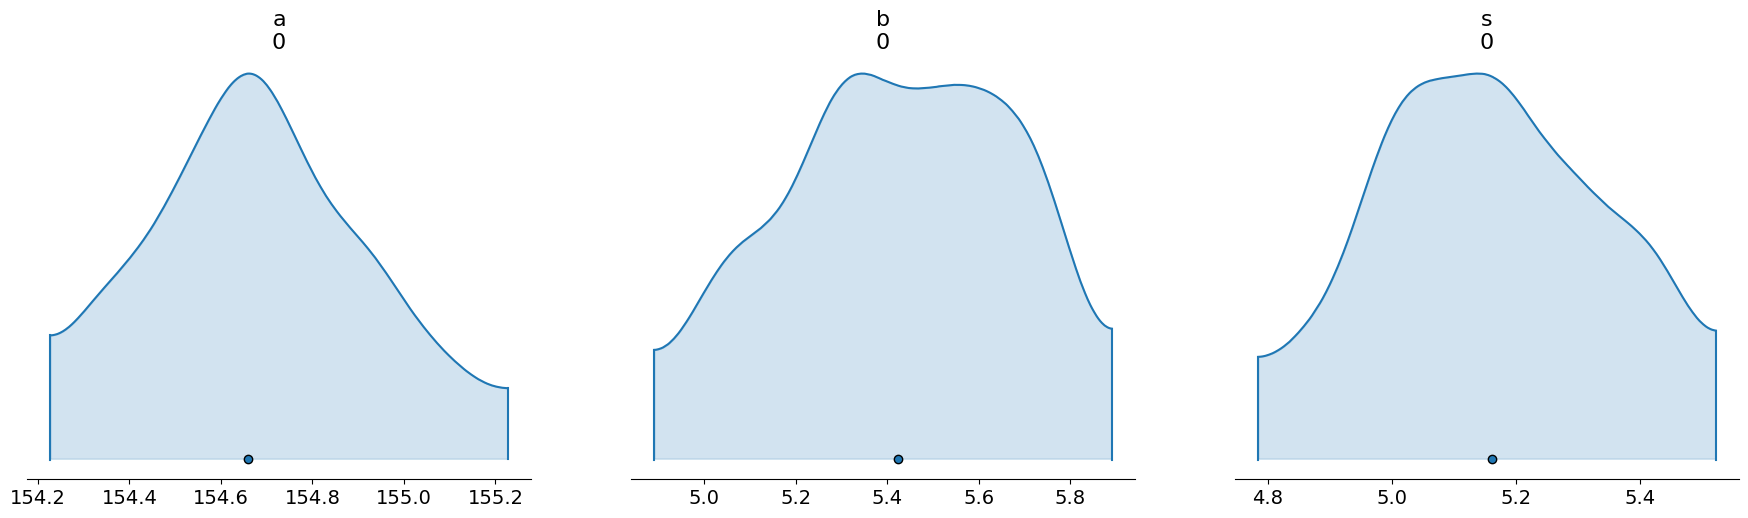

In [8]:
m.diag_density()

arviz - WARNING - Shape validation failed: input_shape: (500, 1), minimum_shape: (chains=1, draws=4)


array([<Axes: title={'center': 'a\n0'}, xlabel='Total number of draws', ylabel='ESS'>,
       <Axes: title={'center': 'b\n0'}, xlabel='Total number of draws', ylabel='ESS'>,
       <Axes: title={'center': 's\n0'}, xlabel='Total number of draws', ylabel='ESS'>],
      dtype=object)

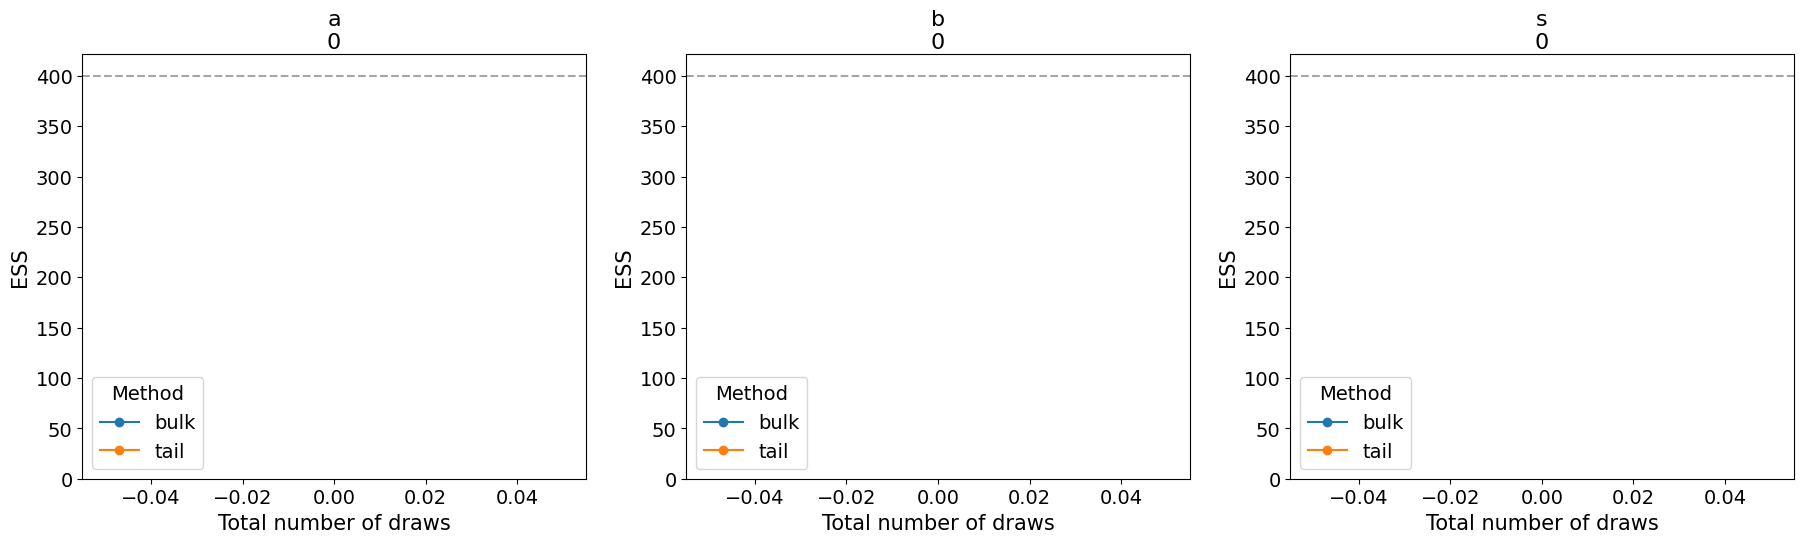

In [9]:
m.diag_plot_ess()